# Project 2

Alex Hindelang and Florian Michael-Schwarzinger

# Q: What are the optimal conditions under which CAR-T gene therapy is effective in leukemia treatment?

An experimental new "living drug" to fight cancer is being put to use: genetically modified T cells. The cells are altered with a chimeric antigen receptor protein (denoted by the CAR acronym), which has the ability to target specific cells and is often derived from viruses like HIV. This is one of the most promising therapies for cancer treatment, but it comes with some potential dangers. The proliferation of CAR-T cells in the body can lead to inflammation and release of toxins. As such, it is important to monitor both the CAR-T cell growth and the cancerous cell growth.

# We wish to investigate the "suicide gene" strategy for reducing CAR-T toxicity in the long term in relation to differing leukemia development rates.

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

We will first use a function to define the system values.

In [30]:
def make_system(Tbirth, Tdeath, cancerbirth, cancerdeath, killrate, suicideinterval, dt):
    """Make a system object of different rates    
    returns: System object
    """
    #This is extremely not the value we're going with
    init = State(carT = 100, cancer = 100) 

    t0 = 0
    #this is also arbitrary
    t_end = 200 

    return System(init=init, t0=t0, t_end=t_end, dt=dt, suicideinterval = suicideinterval, Tbirth = Tbirth, Tdeath = Tdeath, 
                  cancerbirth = cancerbirth, cancerdeath = cancerdeath, killrate = killrate)

Then we need to be able to plot the results in terms of number of cells.

In [31]:
def plot_results(x, y):
    """Plot the results of the CAR-T model
    
    x: TimeSeries
    y: TimeSeries
    """
    plot(x, '--', label='CAR-T')
    plot(y, '-', label='Cancer cells')
    decorate(xlabel='Time (days)',
             ylabel='Number of cells') 
    #will it be number of cells? or concentration?

This function updates the model. The cancer is killed by the CAR-T cells, so that is an added factor along with natural birth and death.

In [32]:
def update_func(state, dt, system):
    """Update the CAR-T model.
    
    state: State (x, y)
    t: time
    system: System object
    
    returns: State (xy)
    """
    carT, cancer = state
    unpack(system)
    
    dcarTdt = Tbirth*carT - Tdeath*carT
    dcancerdt = cancerbirth*cancer - cancerdeath*cancer - killrate*carT
    
    carT += dcarTdt
    cancer += dcancerdt

    return State(carT = carT, cancer = cancer)

Then we run the simulation over a period of time.

In [67]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end, dt):
        """
        if(t%suicideinterval == 0):
            frame.row[t] = init.carT
            print("Reset occurred")
            print(t)
            
        Until I can get numbers, I'm not messing with this
            """
        frame.row[t+dt] = update_func(frame.row[t], dt, system)
    
    return frame

In [68]:
system = make_system(0.1,0.2,0.1,0.3,0.1,10,0.1)

,values
init,carT 100 cancer 100 dtype: int64
t0,0
t_end,200
dt,0.1
suicideinterval,10
Tbirth,0.1
Tdeath,0.2
cancerbirth,0.1
cancerdeath,0.3
killrate,0.1


In [69]:
results = run_simulation(system, update_func)

,carT,cancer
0.0,100,100
0.1,90,70
0.2,81,47
0.3,72.9,29.5
0.4,65.61,16.31
0.5,59.049,6.487
0.6,53.1441,-0.7153
0.7,47.8297,-5.88665
0.8,43.0467,-9.49229
0.9,38.742,-11.8985


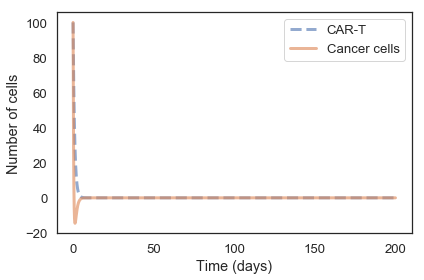

In [70]:
plot_results(results.carT, results.cancer)

In [42]:
#Need to generate suicide rate and sweep it. Need to sweep leukemia growth rate.
"""
Suicide rate is an if statement within the for loop. If the t is divisible by its interval, then it will set all T cells to
initial value again.
"""
#Leukemia growth can be cancer_array = linspace(start, stop, number of divs). Waiting on accurate data to give that value

'\nSuicide rate is an if statement within the for loop. If the t is divisible by its interval, then it will set all T cells to\ninitial value again.\n'

In [8]:
# http://www.pnas.org/content/pnas/92/9/3707.full.pdf This has an estimate for how often memory cells divide